In [28]:
import os
import os.path as osp
from glob import glob
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from pylab import rcParams
import json
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 8, 5

In [29]:
train = pd.read_json('../data/train.json')
val = pd.read_json('../data/val.json')
mapping = json.load(open('../data/class-mapper.json'))

train.head()

,name,lead,label,filename,path
0,209,MLII,N,58087,/home/xperience/hse/graduate/code/data/1D/209/...
1,111,MLII,L,523610,/home/xperience/hse/graduate/code/data/1D/111/...
2,213,MLII,N,104173,/home/xperience/hse/graduate/code/data/1D/213/...
3,115,MLII,N,597452,/home/xperience/hse/graduate/code/data/1D/115/...
4,105,MLII,N,126734,/home/xperience/hse/graduate/code/data/1D/105/...


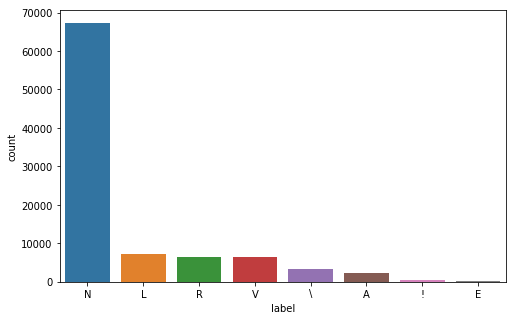

In [30]:
sns.countplot(train['label'], order = train['label'].value_counts().index)

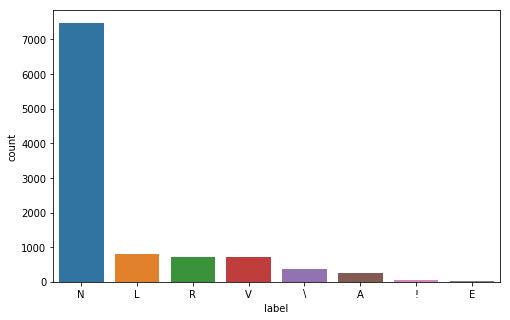

In [31]:
sns.countplot(val['label'], order = val['label'].value_counts().index)

In [32]:
a = 1 / train['label'].value_counts()
a = a / sum(a)
a

N    0.001055
L    0.009770
R    0.010870
V    0.011075
\    0.021793
A    0.030991
!    0.167062
E    0.747383
Name: label, dtype: float64

In [33]:
mapping

{'N': 0, 'L': 1, 'V': 2, '\\': 3, 'R': 4, 'A': 5, '!': 6, 'E': 7}

In [34]:
import numpy as np
weights = np.zeros(len(mapping))
for i in a.index:
    weights[mapping[i]] = a[i]

In [35]:
weights

array([0.00105497, 0.00977039, 0.01107494, 0.02179295, 0.01086978,
       0.03099145, 0.16706216, 0.74738336])

# Visualization

In [83]:
import wfdb
from PIL import Image

In [84]:
ecg_data = sorted([osp.splitext(i)[0] for i in glob('../mit-bih/*.atr')])

In [85]:
ecg = ecg_data[0]
ann = wfdb.rdann(ecg, extension='atr')
record = wfdb.rdrecord(ecg)

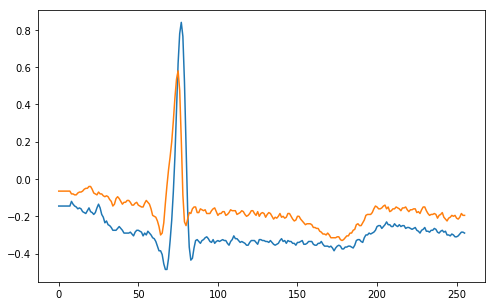

In [86]:
plt.plot(record.p_signal[0:256])

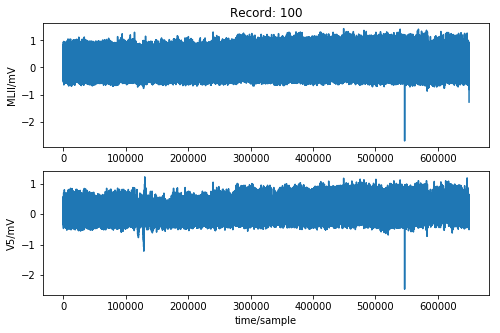

In [40]:
wfdb.plot_wfdb(record)

In [41]:
Normal = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/N/*.png')[:9]]
A = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/A/*.png')[:9]]

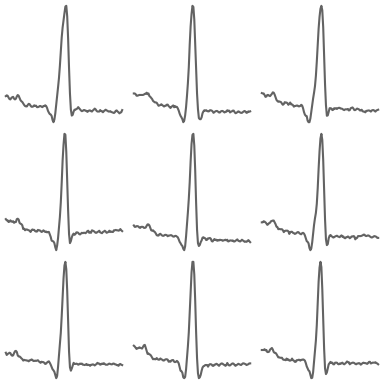

In [42]:
Image.fromarray(np.vstack( [np.hstack(Normal[i::3]) for i in range(0,3)] ))

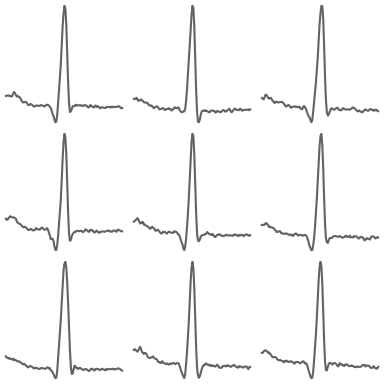

In [43]:
Image.fromarray(np.vstack( [np.hstack(A[i::3]) for i in range(0,3)] ))